Date: 1st June 2023

Author: Ayushi Asthana

# **Usecase: Customer Segmentation Classification**

#### Problem Statement / Requirement 
Reference Link: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.
You are required to help the manager to predict the right group of the new customers.

#### Solution Overview
Using PyCaret, create & review multiple classification models. Choose the best model & using it, predict the new customer segments.

## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd 

import pycaret 
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

## 2) Loading Data

Data Source Details:

* Link: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download
* Source: Analytics vidhya hackathon
* Collection Methodology: This dataset was published by analytics vidhya for one of their competitions

In [3]:
#Load train & test files
train = pd.read_csv(r'C:\Users\hp\Desktop\Portfolio Projects\PyCaret Implimantation + ML in powerbi\Dataset\Train.csv')
test = pd.read_csv(r'C:\Users\hp\Desktop\Portfolio Projects\PyCaret Implimantation + ML in powerbi\Dataset\Test.csv')

#Joining test and train data frames together for analyzing the complete data
df = pd.concat([train,test],axis=0)

## 3) Environment Setup

Before setting up the environment, we must import the appropriate module for our data. In our usecase it is of classification module.

The core setup of the Pycaret environment lies in a function named setup(). The setup() function starts the environment and pipeline to handle the data for modeling and deployment. This function must be initiated before executing other functions in PyCaret.

There are around 50 parameters that are to be fed into setup() function, out of which there are only two mandatory parameters to be fed and they are Data & Target parameter. Other parameters have default values & can be changed according to dataset & its requirements.

### Exploratory Data Analysis

By EDA we will try to answers following questions, based on which we will identify the value of related parameters for the pre-processing using pycaret: 

#### **(i) Data Preparation & Normalization/Transformation**

* What are the Data Types of the Feature?
* Does the data contain missing values. If yes how to handle missing values for different data types?
* Incase of categorical data what type of encodin is required based of type of categorical data?
* Dataset is imbalanced or balance?
* Any potential Outliers?
* Decide whether Normalization/Transformation required for numerical features?

#### **(ii) Feature Engineering & Feature Selection**

* Bining required for any columns?
* Is there any need to combine the rare levels of any feature?
* Any new feture can be created & useful from existing features?
* Feature Selction should be performed?
* Based on dimentions of dataset, do we need PCA?
* Multicollinearity is present or not, what should be the threshold to handle multicollinearity ?

In [4]:
#data shape, column wise datatype & memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB
None


In [5]:
#let check how the data looks
print(df.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [6]:
print("Column wise missing values percentage")
round((df.isnull().sum()/df.shape[0])*100,2)

Column wise missing values percentage


ID                  0.00
Gender              0.00
Ever_Married        1.78
Age                 0.00
Graduated           0.95
Profession          1.51
Work_Experience    10.27
Spending_Score      0.00
Family_Size         4.19
Var_1               1.01
Segmentation        0.00
dtype: float64

In [7]:
print("Numerical Data \n",df.describe())
print("\n\nCategorical Data \n",df.describe(include = 'object'))

Numerical Data 
                   ID           Age  Work_Experience   Family_Size
count   10695.000000  10695.000000      9597.000000  10247.000000
mean   463468.088640     43.511828         2.619777      2.844052
std      2600.966411     16.774158         3.390790      1.536427
min    458982.000000     18.000000         0.000000      1.000000
25%    461220.500000     30.000000         0.000000      2.000000
50%    463451.000000     41.000000         1.000000      3.000000
75%    465733.500000     53.000000         4.000000      4.000000
max    467974.000000     89.000000        14.000000      9.000000


Categorical Data 
        Gender Ever_Married Graduated Profession Spending_Score  Var_1  \
count   10695        10505     10593      10533          10695  10587   
unique      2            2         2          9              3      7   
top      Male          Yes       Yes     Artist            Low  Cat_6   
freq     5841         6163      6570       3318           6494   6910   

  

Lets understand the distribution of the individual numerical features to decide the appropriate imputation technique.

<AxesSubplot:>

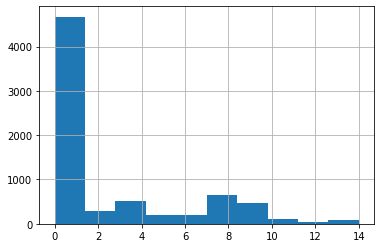

In [8]:
train['Work_Experience'].hist()

<AxesSubplot:>

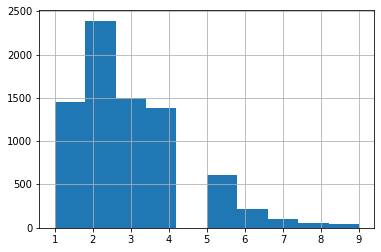

In [9]:
train['Family_Size'].hist()

<AxesSubplot:>

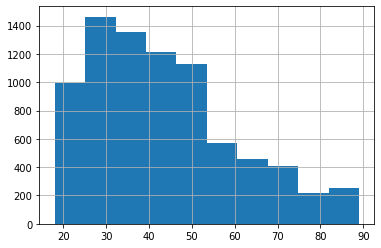

In [10]:
train['Age'].hist()

<AxesSubplot:xlabel='Segmentation'>

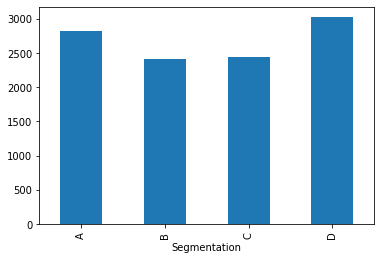

In [11]:
#Check if the data is balanced or imbalanced
Segmentation_Data = df.groupby(by='Segmentation').size()

Segmentation_Data.plot.bar()

In [12]:
#list of categorical columns
cat_cols = []
for i in df.columns:
    if df[i].dtype == "object":
        cat_cols.append(i)   
cat_cols.remove("Segmentation")  # excluding Taget Column
cat_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [13]:
#list of numerial columns
num_cols = []
for i in df.columns:
    if df[i].dtype != "object":
        num_cols.append(i)   
num_cols.remove("Age")
num_cols.remove("ID")
num_cols

['Work_Experience', 'Family_Size']

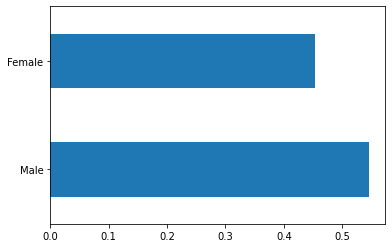

In [14]:
#plot the bar graph of percentage of "Gender"
df.Gender.value_counts(normalize=True).plot.barh()
plt.show()

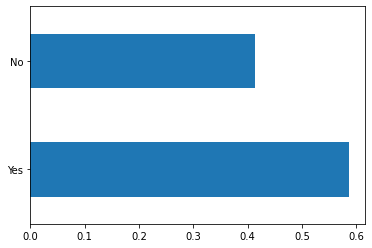

In [15]:
#plot the bar graph of percentage of "Ever_Married"
df.Ever_Married.value_counts(normalize=True).plot.barh()
plt.show()

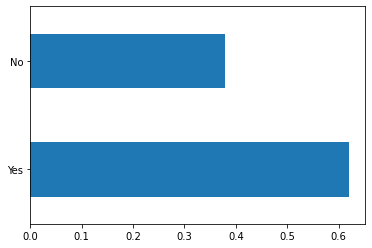

In [16]:
#plot the bar graph of percentage og "Graduated"
df.Graduated.value_counts(normalize=True).plot.barh()
plt.show()

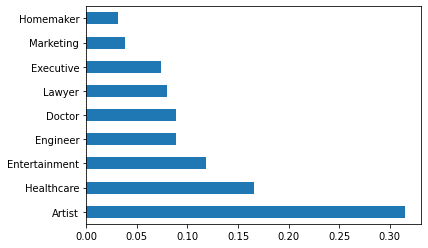

In [17]:
#plot the bar graph of percentage og "Profession"
df.Profession.value_counts(normalize=True).plot.barh()
plt.show()

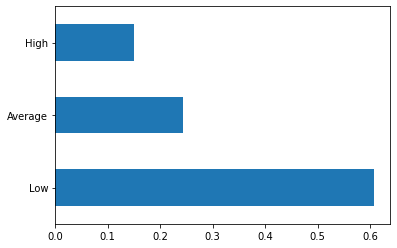

In [18]:
#plot the bar graph of percentage og "Spending_Score"
df.Spending_Score.value_counts(normalize=True).plot.barh()
plt.show()

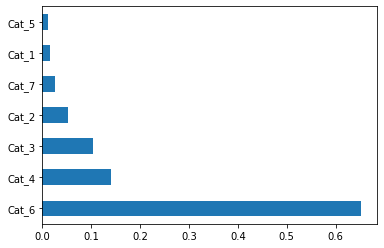

In [19]:
#plot the bar graph of percentage og "Var_1"
df.Var_1.value_counts(normalize=True).plot.barh()
plt.show()

In [20]:
# sample 5% of data to be used as unseen data
data = df.sample(frac=0.95, random_state= 50)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [21]:
print("Shape of data for training the model: ",data.shape)
print("Shape of unseen data: ",data_unseen.shape)

Shape of data for training the model:  (10160, 11)
Shape of unseen data:  (283, 11)


### **Inferences & Parameters:**


We can have following inferences after exploring data & accordingly we can pass the corresponsing parameters to setup() of pycaret:
1. Column-wise data understanding
    * ID (This column do not contribute much value to our analysis, it should not be considered for training)
    * Work_Experience (Numerical)
    * Family_Size (Numerical)
    * Age (This column has a wide range of values & it is a numerical column that should be binned)
    * Spending_Score (Ordinal Data)
    * Gender (Nominal Data)
    * Ever_Married (Nominal Data)
    * Graduated (Nominal Data)
    * Profession (Nominal Data)
    * Var_1 (Nominal Data)
    * Segmentation (This is "Taget" Column for Classification)


        - *ignore_features=['ID']*
        - *numeric_features = num_cols*
        - *categorical_features = cat_cols*
        - *target = 'Segmentation'*
        - *bin_numeric_features = ['Age']*
        - *ordinal_features = {'Spending_Score' : ['low', 'medium', 'high']}*
        
    
2. As the missing value % for all the categorical values is 1% or less so we can replace null values with "NA" for all the categorical Columns
3. As we can see the distribution for numerical columns (Work_Experience & Family_Size) is not normal/gaussian & is skewed,so "Median" value will be suitable to replace the missing values & log transformation of the features are required instead of normalization.

        - *imputation_type = 'simple'* 
        - *categorical_imputation = 'NA'* Remove rows till 5% data loss is ok ..
        - *numeric_imputation = 'median'*
        - *transformation=True*

4. "Profession" & "Var_1" features have high cardinality & the occurances for few subcategories is <10%, so we will combine the subcategories/(levels) that have occurance less than 8%.

         - *combine_rare_levels = True*
         - *rare_level_threshold = 0.08* 
         
5. The dataset is not imbalaced  around the Target labels.
6. No potential ouliers identified.

         - *fix_imbalance = False*
         - *remove_outliers = True*

7. Feature selection is not required as we have very few features.
8. Multicollinearity should be address if any.
remove_multicollinearity = True, multicollinearity_threshold = 0.3
7. Other parameter: 
    
        - *data = data*
        - *train_size = 0.8*
        - *preprocess = True*

### **Initialize setup using parameters**

In [22]:
#based on above inferences, assign the parameter values
from pycaret.classification import *
s = setup(data = data, 
          target = 'Segmentation',
          ignore_features=['ID'],
          numeric_features = num_cols,
          categorical_features = cat_cols,
          bin_numeric_features = ['Age'],
          ordinal_features = {'Spending_Score' : ['Low', 'Average', 'High']},
          imputation_type = 'simple',
          categorical_imputation = 'constant',
          numeric_imputation = 'median',
          transformation=True,
          combine_rare_levels = True,
          rare_level_threshold = 0.08,
          #rare_to_value = "Other Infrequent",
          fix_imbalance = False,
          remove_outliers = True,
          train_size = 0.8,
          preprocess = True, 
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.7, 
          session_id=123)

,Description,Value
0,session_id,123
1,Target,Segmentation
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(10160, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,True
9,High Cardinality Features,False


## 4) Get the BEST model

In [24]:
#get the best model
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.4782,0.7319,0.4703,0.4710,0.4716,0.3004,0.3018,0.7310
lightgbm,Light Gradient Boosting Machine,0.4699,0.7232,0.4622,0.4636,0.4644,0.2890,0.2900,0.1190
lr,Logistic Regression,0.4632,0.7202,0.4543,0.4523,0.4501,0.2803,0.2835,0.1060
lda,Linear Discriminant Analysis,0.4573,0.7195,0.4493,0.4515,0.4437,0.2730,0.2777,0.0330
ada,Ada Boost Classifier,0.4679,0.7154,0.4596,0.4620,0.4581,0.2867,0.2896,0.0930
nb,Naive Bayes,0.4370,0.6930,0.4324,0.4280,0.4197,0.2487,0.2545,0.0200
qda,Quadratic Discriminant Analysis,0.4313,0.6860,0.4269,0.4270,0.4228,0.2413,0.2441,0.0300
rf,Random Forest Classifier,0.4170,0.6738,0.4117,0.4147,0.4153,0.2198,0.2200,0.3410
knn,K Neighbors Classifier,0.4156,0.6657,0.4109,0.4261,0.4185,0.2188,0.2197,0.0940
et,Extra Trees Classifier,0.4016,0.6423,0.3966,0.4043,0.4023,0.1996,0.1998,0.3690


## 5) Evaluate

In [ ]:
#evaluating model
evaluate_model(best)

In [ ]:
help(get_config)

## **Conclusion / Future Scope:**

1. Now we can go ahead & use this best model for predictions. 
2. We can use get_config & set_config, to understand the model. They allow to access & change everything in the background.